In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind

# Structure grid searches

## ConvNet grid search

In [8]:
# add encoder_depth

bdd = pd.read_csv("/neurospin/dico/agaudin/Runs/09_new_repo/Output/grid_searches/step3/occipital/supervised_structure/bdd_occipital_convnet.csv", index_col=0)
bdd.loc[bdd.fusioned_latent_space_size == -1, "converter_activation"] = None
bdd

,model_path,best_model_epoch,train_auc,val_auc,test_auc,test_intra_auc,best_train_auc,best_val_auc,best_test_auc,best_test_intra_auc,backbone_output_size,converter_activation,drop_rate,fusioned_latent_space_size,lr,max_angle,projection_head_name,sigma_noise,encoder_depth,train_loss
0,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,1,0.973012,0.487318,0.518423,0.430727,0.705252,0.627859,0.579432,0.612993,32,relu,0.041285,4,0.004464,5,relu,0.169030,1,89.684822
1,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,1,0.964324,0.495218,0.515554,0.511084,0.728735,0.629938,0.589701,0.647167,32,None,0.183185,-1,0.001095,4,relu,0.232218,1,96.417900
2,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0,0.981250,0.543451,0.546361,0.556342,0.745220,0.607069,0.597705,0.580049,32,linear,0.079118,10,0.000115,6,linear,0.211236,2,100.946571
3,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,19,0.500000,0.500000,0.500000,0.500000,0.589085,0.609356,0.552326,0.552494,32,sigmoid,0.064660,10,0.000925,1,sigmoid,0.074499,3,133.803833
4,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,12,0.583154,0.609148,0.534280,0.586823,0.539669,0.674012,0.582905,0.585591,4,None,0.193115,-1,0.000278,0,sigmoid,0.033211,2,134.057785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,10,sigmoid,0.071708,10,0.001865,4,linear,0.375128,1,134.006088
146,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,2,0.584562,0.548025,0.506494,0.614224,0.565902,0.646985,0.590909,0.575431,4,None,0.140379,-1,0.048908,5,relu,0.360923,3,178.091522
147,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,1,0.850926,0.500208,0.538961,0.542488,0.581504,0.644075,0.581546,0.637007,32,None,0.062634,-1,0.034709,2,relu,0.296259,1,559.056030
148,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,32,sigmoid,0.175805,32,0.011763,6,linear,0.030498,2,134.002930


In [9]:
print("Mean value for the structural grid search: ", bdd.best_test_auc.mean())
gs_config = bdd[(bdd.backbone_output_size == 10) &\
                (bdd.converter_activation == 'relu') &\
                (bdd.fusioned_latent_space_size == 10) &\
                (bdd.projection_head_name == 'relu')]
gs_config

Mean value for the structural grid search:  0.545179200644317


,model_path,best_model_epoch,train_auc,val_auc,test_auc,test_intra_auc,best_train_auc,best_val_auc,best_test_auc,best_test_intra_auc,backbone_output_size,converter_activation,drop_rate,fusioned_latent_space_size,lr,max_angle,projection_head_name,sigma_noise,encoder_depth,train_loss
29,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,6,0.596760,0.541788,0.568559,0.616071,0.590589,0.632017,0.557686,0.611453,10,relu,0.141465,10,0.001970,1,relu,0.011804,3,133.660049
48,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,2,0.991808,0.546778,0.543189,0.499076,0.712431,0.628274,0.592419,0.642857,10,relu,0.058012,10,0.003454,0,relu,0.290036,1,70.219704


backbone_output_size


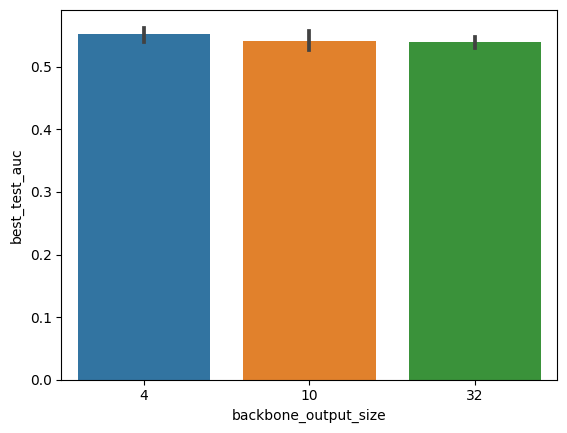

converter_activation


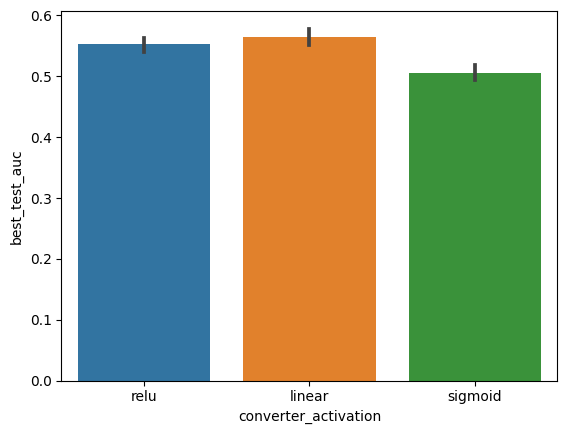

drop_rate


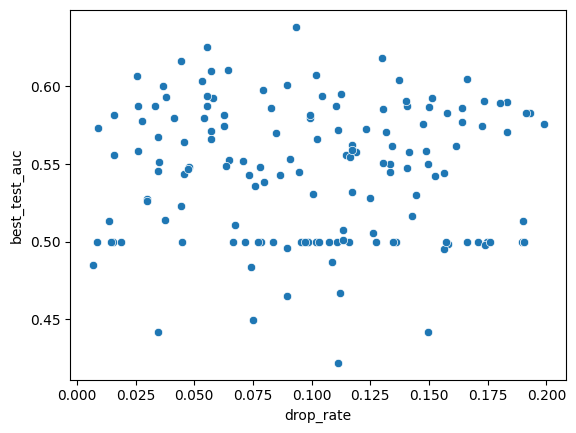

fusioned_latent_space_size


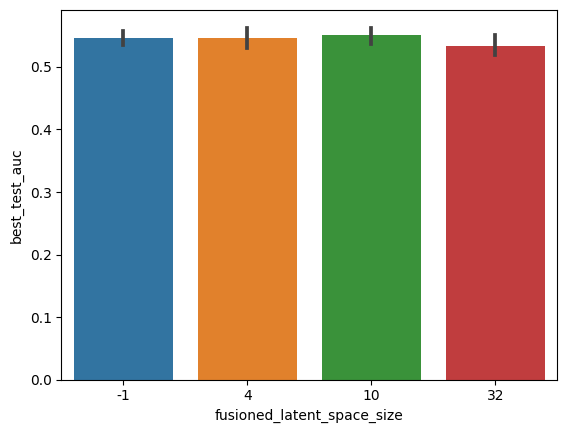

lr


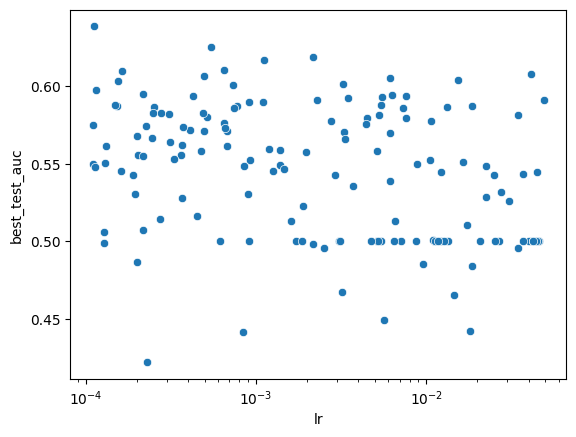

max_angle


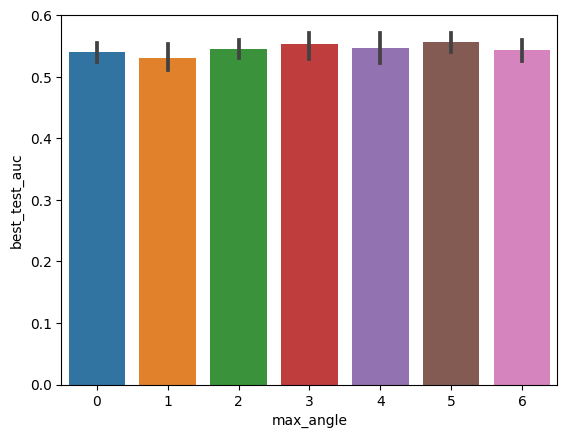

projection_head_name


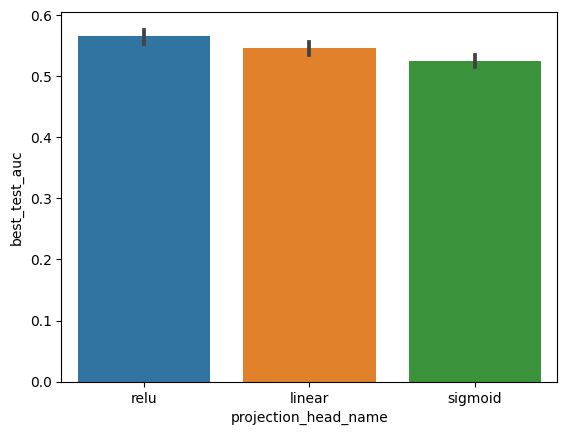

sigma_noise


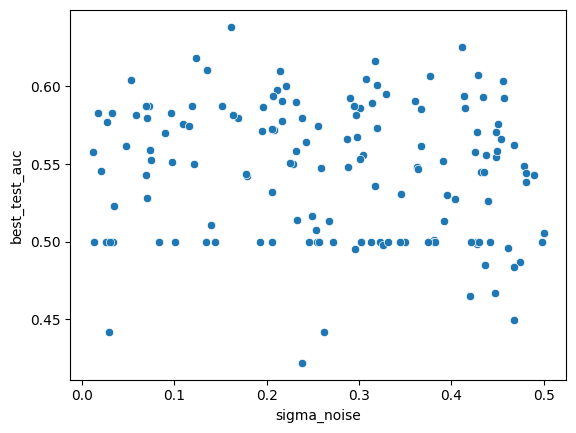

encoder_depth


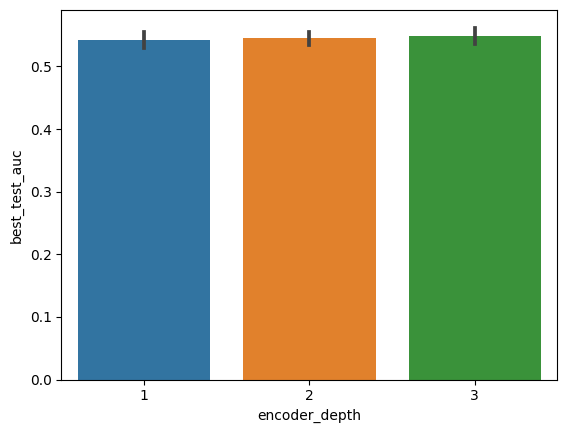

In [16]:
params = ['backbone_output_size', 'converter_activation', 'drop_rate',
          'fusioned_latent_space_size', 'lr', 'max_angle',
          'projection_head_name', 'sigma_noise', 'encoder_depth']

for param in params:
    print(param)
    plt.figure()
    if len(bdd[param].unique()) > 10:
        if param == 'lr':
            plt.xscale('log')
        sns.scatterplot(bdd, x=param, y='best_test_auc')
    else:
        sns.barplot(bdd, x=param, y='best_test_auc')
    plt.show()

27
backbone_output_size


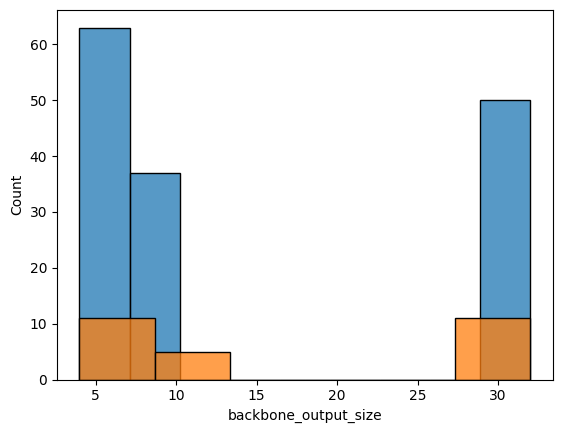

converter_activation


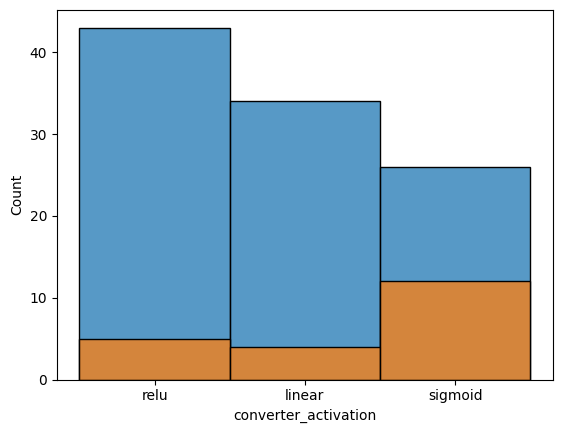

drop_rate


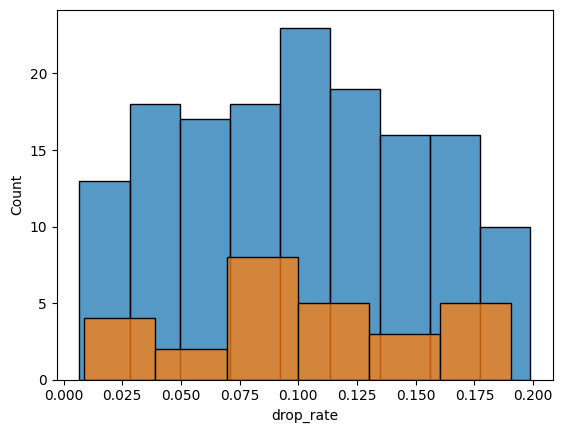

fusioned_latent_space_size


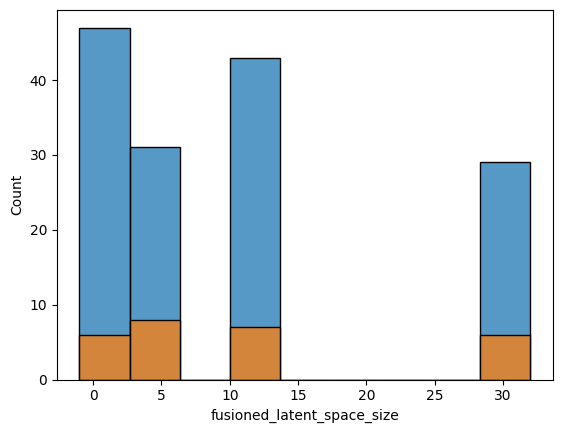

lr


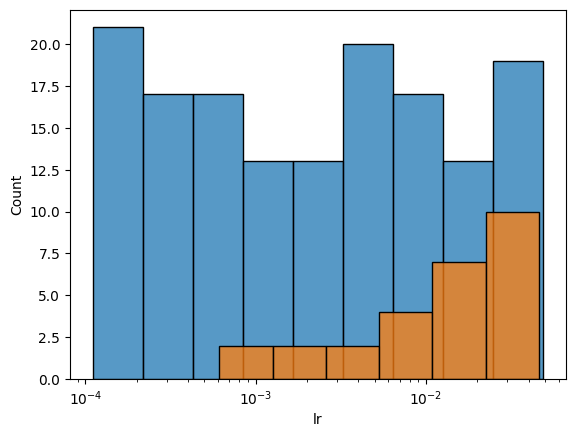

max_angle


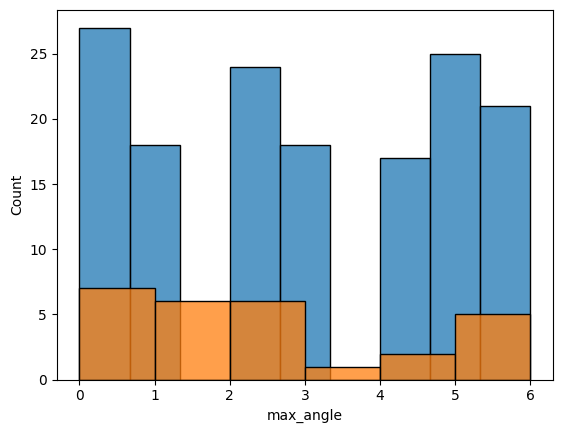

projection_head_name


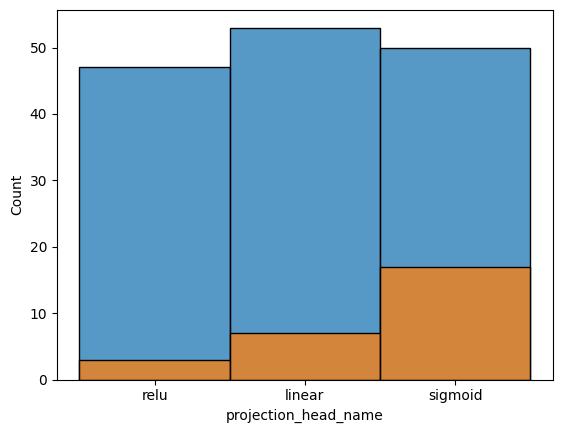

sigma_noise


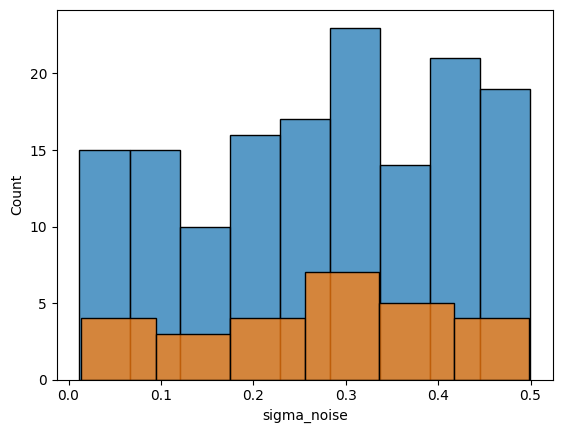

encoder_depth


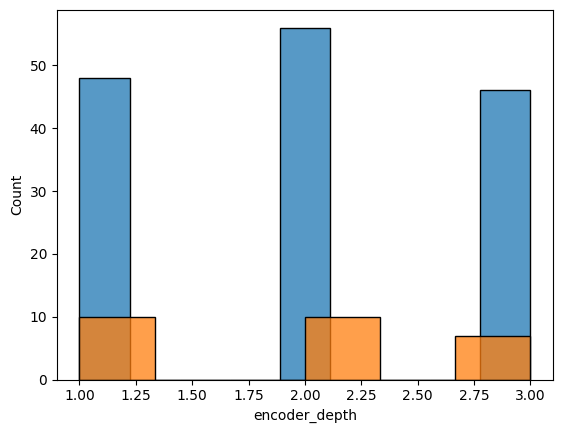

In [22]:
failures = bdd[bdd.best_train_auc == 0.5]
print(failures.shape[0])

for param in params:
    print(param)
    plt.figure()
    if param == 'lr':
        plt.xscale('log')
    sns.histplot(bdd, x=param)
    sns.histplot(failures, x=param)
    plt.show()

## Densenets

In [3]:
densenets = pd.read_csv("/neurospin/dico/agaudin/Runs/09_new_repo/Output/grid_searches/step3/occipital/supervised_structure/bdd_occipital_densenet.csv", index_col=0)
densenets.loc[densenets.fusioned_latent_space_size == -1, "converter_activation"] = None
densenets

,model_path,best_model_epoch,train_auc,val_auc,test_auc,test_intra_auc,best_train_auc,best_val_auc,best_test_auc,best_test_intra_auc,backbone_output_size,converter_activation,drop_rate,fusioned_latent_space_size,lr,max_angle,percentage,projection_head_name,sigma_noise,train_loss
0,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0,0.498797,0.513514,0.538961,0.517857,0.485075,0.562370,0.516007,0.517857,4,sigmoid,0.026806,10,0.000703,6,0,relu,0.095402,133.813324
1,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,4,sigmoid,0.000382,4,0.000844,3,0,linear,0.393347,133.780319
2,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,2,0.955450,0.596258,0.517668,0.476601,0.643812,0.630769,0.598309,0.650554,32,linear,0.195450,10,0.000392,4,0,linear,0.177654,71.665901
3,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,2,0.854855,0.380457,0.482030,0.610222,0.781750,0.555094,0.484446,0.631773,32,linear,0.177022,4,0.002010,0,0,relu,0.043361,110.893402
4,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,4,1.000000,0.594595,0.386288,0.575431,0.807630,0.644491,0.472667,0.587131,4,None,0.143228,-1,0.000220,4,0,relu,0.014304,17.570660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,25,0.510167,0.499376,0.525974,0.440425,0.515284,0.540956,0.534280,0.537254,32,None,0.093267,-1,0.000130,5,0,sigmoid,0.403520,133.823944
91,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,62,0.533580,0.503119,0.534355,0.490148,0.510847,0.533264,0.549985,0.512315,4,None,0.053236,-1,0.000629,1,0,sigmoid,0.068305,133.782669
92,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0,0.477437,0.490437,0.452507,0.518319,0.529226,0.539709,0.536469,0.508313,4,relu,0.112033,10,0.000577,5,0,sigmoid,0.294918,133.839264
93,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,21,0.518008,0.504366,0.515630,0.471675,0.520139,0.532640,0.533223,0.469366,4,None,0.144669,-1,0.001379,5,0,sigmoid,0.106025,135.134506


In [6]:
print("Mean value for the structural grid search: ", densenets.best_test_auc.mean())

Mean value for the structural grid search:  0.5152720596417049


backbone_output_size


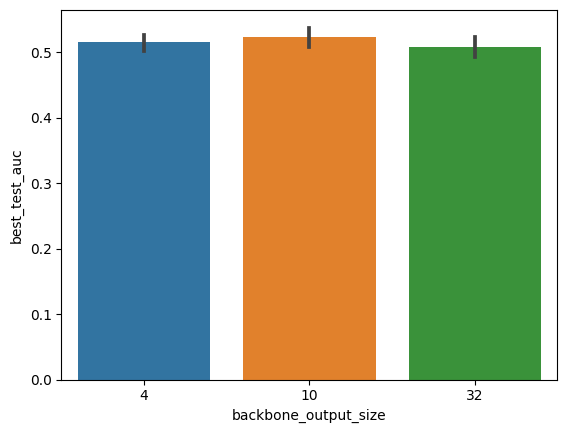

converter_activation


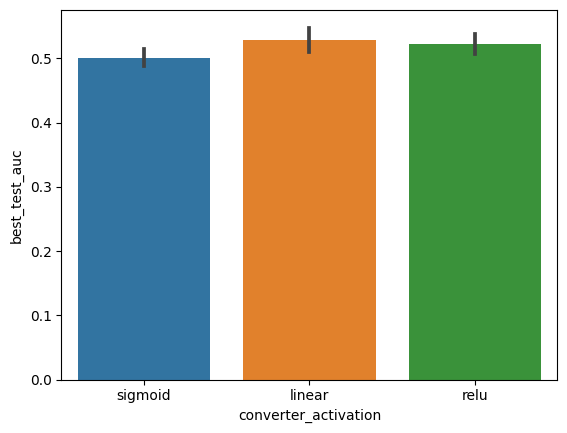

drop_rate


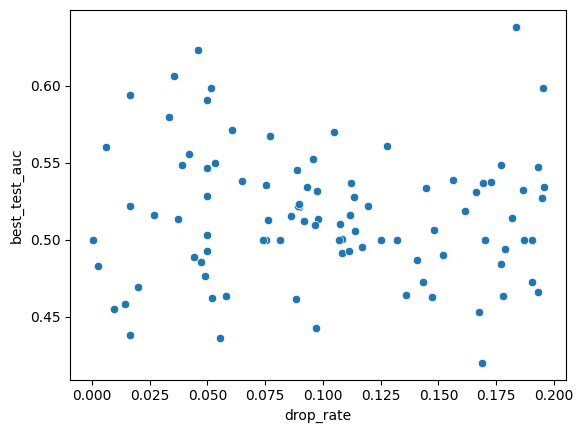

fusioned_latent_space_size


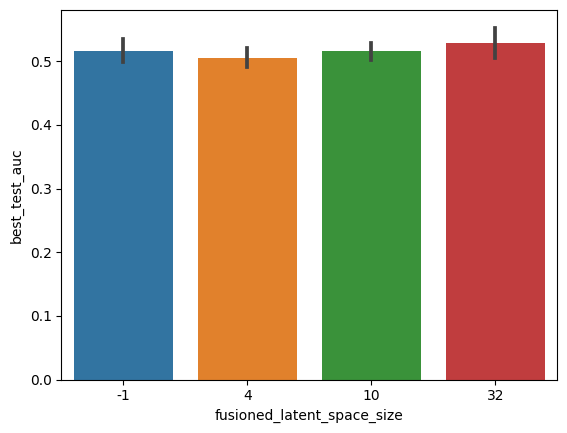

lr


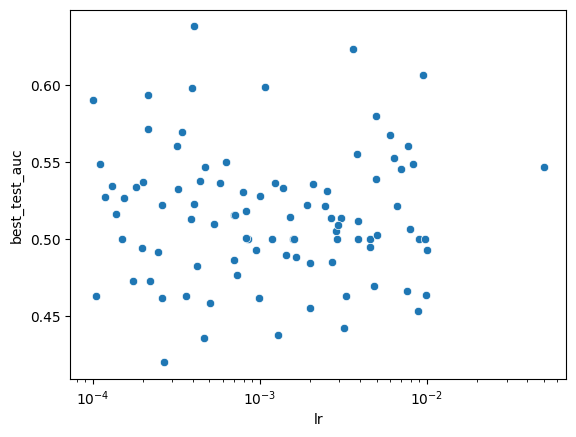

max_angle


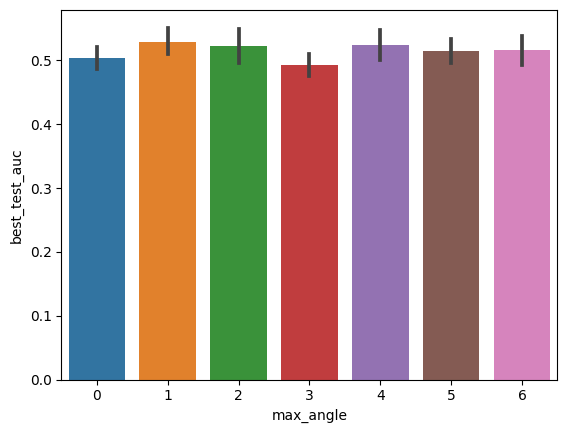

projection_head_name


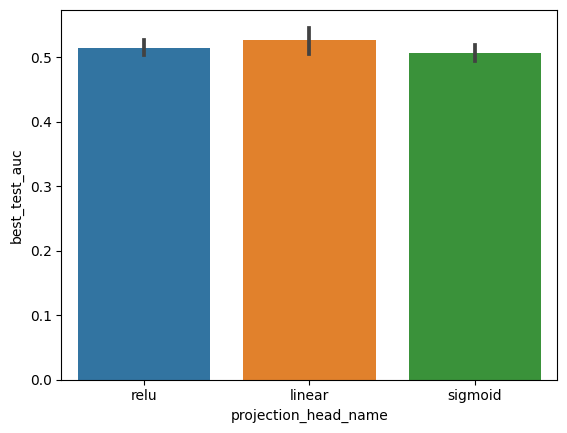

sigma_noise


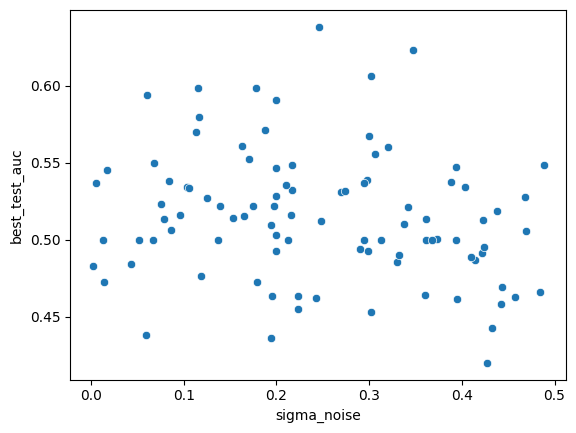

In [5]:
params = ['backbone_output_size', 'converter_activation', 'drop_rate',
          'fusioned_latent_space_size', 'lr', 'max_angle',
          'projection_head_name', 'sigma_noise']

for param in params:
    print(param)
    plt.figure()
    if len(densenets[param].unique()) > 10:
        if param == 'lr':
            plt.xscale('log')
        sns.scatterplot(densenets, x=param, y='best_test_auc')
    else:
        sns.barplot(densenets, x=param, y='best_test_auc')
    plt.show()

9
backbone_output_size


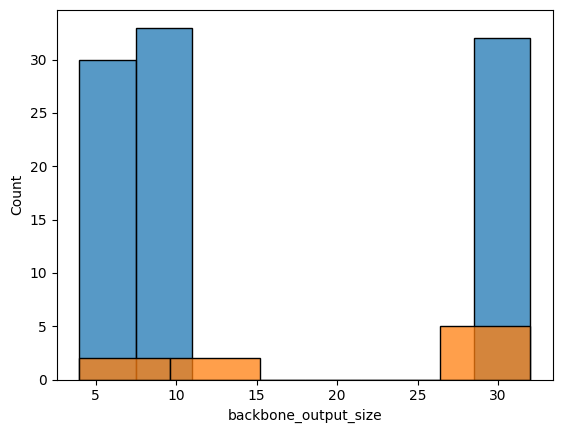

converter_activation


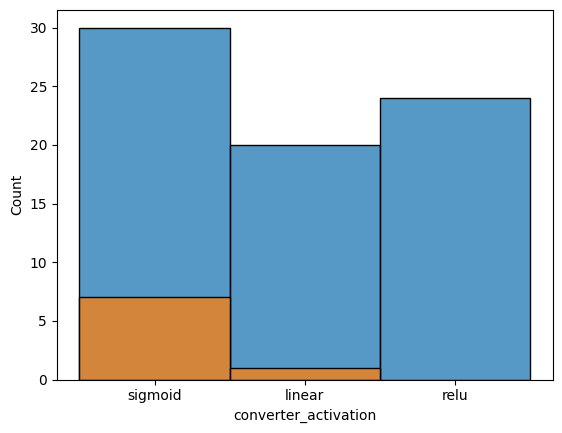

drop_rate


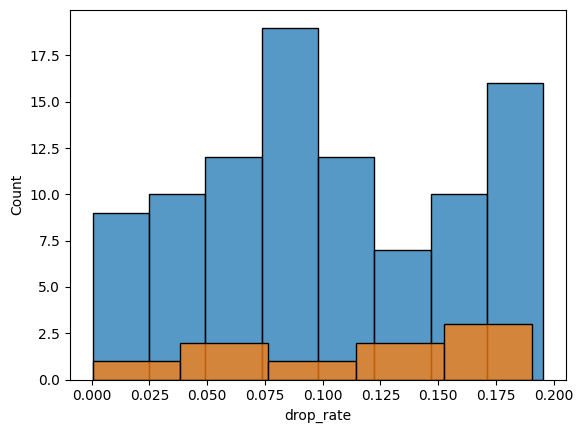

fusioned_latent_space_size


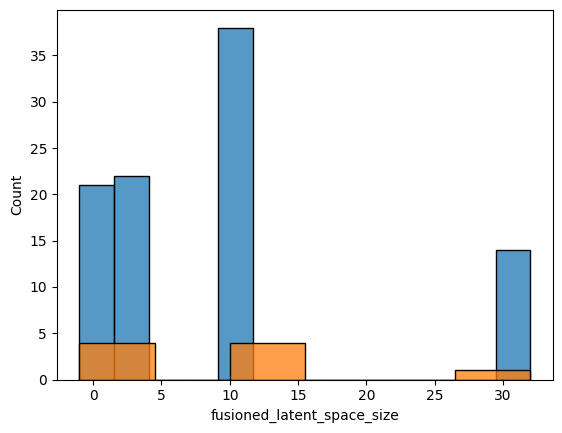

lr


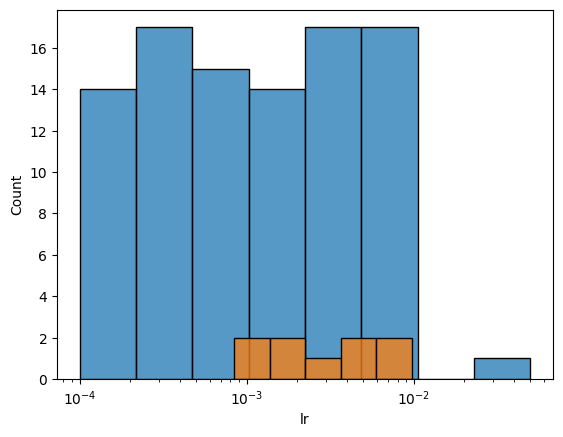

max_angle


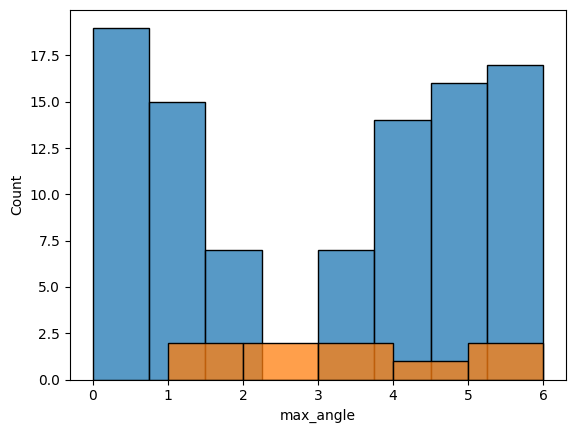

projection_head_name


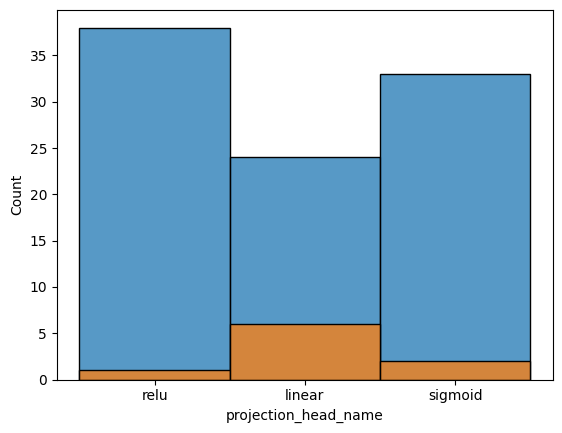

sigma_noise


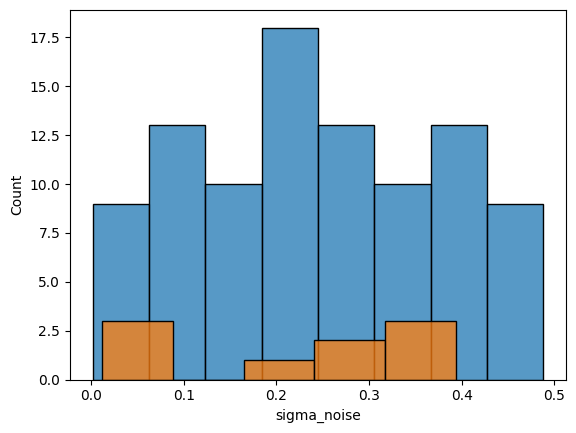

In [8]:
densenet_failures = densenets[densenets.best_train_auc == 0.5]
print(densenet_failures.shape[0])

for param in params:
    print(param)
    plt.figure()
    if param == 'lr':
        plt.xscale('log')
    sns.histplot(densenets, x=param)
    sns.histplot(densenet_failures, x=param)
    plt.show()

# Densenet occipital grid search

In [10]:
densenet_bdd = pd.read_csv("/neurospin/dico/agaudin/Runs/09_new_repo/Output/grid_searches/step3/occipital/densenet_gridsearch/bdd_occipital_densenet.csv", index_col=0)
densenet_bdd

,model_path,best_model_epoch,train_auc,val_auc,test_auc,test_intra_auc,best_train_auc,best_val_auc,best_test_auc,best_test_intra_auc,drop_rate,lr,max_angle,sigma_noise,train_loss
0,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0,0.928325,0.501871,0.489882,0.520012,0.522548,0.671518,0.548475,0.481527,0.104987,0.009298,4,0.421958,116.132561
1,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,2,0.974722,0.516840,0.509816,0.592980,0.543469,0.651975,0.510722,0.469828,0.094790,0.012053,5,0.268171,108.820534
2,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,38,0.480132,0.550936,0.506947,0.509544,0.572044,0.661954,0.530202,0.595135,0.009496,0.000153,5,0.466831,126.745049
3,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,36,0.692475,0.671518,0.520991,0.604680,0.653272,0.718919,0.489429,0.571121,0.028810,0.011413,5,0.486382,129.263077
4,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,7,0.971839,0.524324,0.576412,0.589901,0.751552,0.546362,0.613863,0.522167,0.094332,0.067796,1,0.096168,85.604790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,16,0.757904,0.542204,0.520840,0.567426,0.743971,0.591684,0.506191,0.586207,0.181077,0.000692,4,0.387929,106.589386
61,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,10,0.694112,0.529314,0.611900,0.552956,0.669155,0.660707,0.525370,0.533559,0.141935,0.043069,1,0.115776,135.400711
62,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,20,0.821771,0.586694,0.511401,0.614840,0.821771,0.586694,0.511401,0.614840,0.008842,0.000387,3,0.398283,123.033691
63,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0,0.998511,0.547609,0.615977,0.584975,0.648199,0.620374,0.578224,0.641010,0.184412,0.001190,0,0.156933,63.133457


Mean best test AUC:  0.529999070696745
Mean best test auc (top5):  0.6068559347629116


Text(0.5, 1.0, 'Densenets')

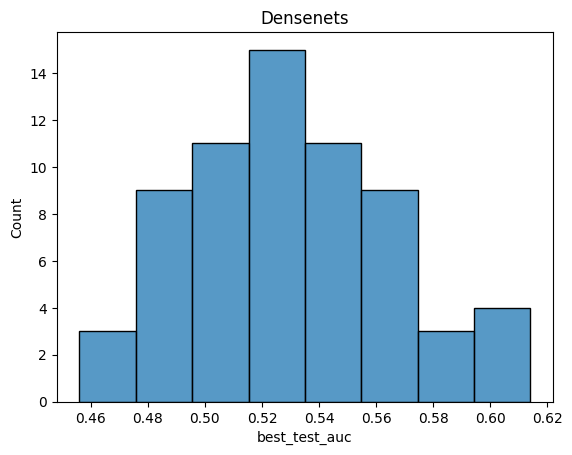

In [26]:
print('Mean best test AUC: ', densenet_bdd.best_test_auc.mean())
print('Mean best test auc (top5): ', densenet_bdd.sort_values(by='best_test_auc', ascending=False).best_test_auc[:5].mean())

sns.histplot(densenet_bdd, x='best_test_auc')
plt.title('Densenets')

Mean best test AUC:  0.582408386187456
Mean best test auc (top5):  0.6326789489580187


Text(0.5, 1.0, 'Convnets')

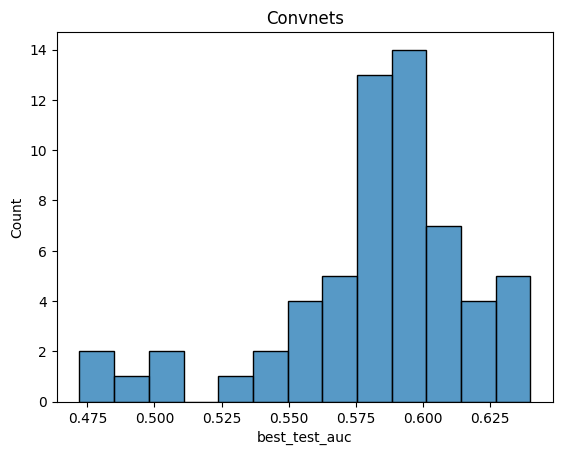

In [27]:
# compare with the one with convnets
bdd_gs = pd.read_csv("/neurospin/dico/agaudin/Runs/09_new_repo/Output/grid_searches/step2/bdd_step2.csv", index_col=0)
occipital = bdd_gs[bdd_gs.datasets == "('occipital_schiz_R_strat_bis', 'occipital_schiz_L_strat_bis')"]

print('Mean best test AUC: ', occipital.best_test_auc.mean())
print('Mean best test auc (top5): ', occipital.sort_values(by='best_test_auc', ascending=False).best_test_auc[:5].mean())

sns.histplot(occipital, x='best_test_auc')
plt.title('Convnets')

# Recrop

In [18]:
recrop_bdd = pd.read_csv('/neurospin/dico/agaudin/Runs/09_new_repo/Output/grid_searches/step3/occipital/recrop_threshold1/bdd_occipital_recrop.csv', index_col=0)

recrop_bdd.best_test_auc.mean(), recrop_bdd.best_test_auc.std()

(0.5627806302224908, 0.050471758825186744)

In [14]:
bdd_step2 = pd.read_csv("/neurospin/dico/agaudin/Runs/09_new_repo/Output/grid_searches/step2/bdd_step2.csv", index_col=0)
bdd_step2 = bdd_step2[bdd_step2.datasets == "('occipital_schiz_R_strat_bis', 'occipital_schiz_L_strat_bis')"]
bdd_step2.best_test_auc.mean(), bdd_step2.best_test_auc.std()

(0.582408386187456, 0.03620107813684696)

In [12]:
ttest_ind(bdd_step2.best_test_auc, recrop_bdd.best_test_auc)

Ttest_indResult(statistic=1.7113769814494555, pvalue=0.0905341835637661)